## Decision Tree implementation on IRIS dataset, later using Hyperparameter Tuning, post-pruning and pre-pruning

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
from sklearn.datasets import load_iris

In [24]:
iris = load_iris()

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [26]:
##Independent Features
X = pd.DataFrame(iris.data, columns=['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm'])

In [27]:
##dependent feature
y = iris.target

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [36]:
## applying the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()

In [37]:
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.165\nsamples = 44\nvalue = [0, 40, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.6\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'x[2]

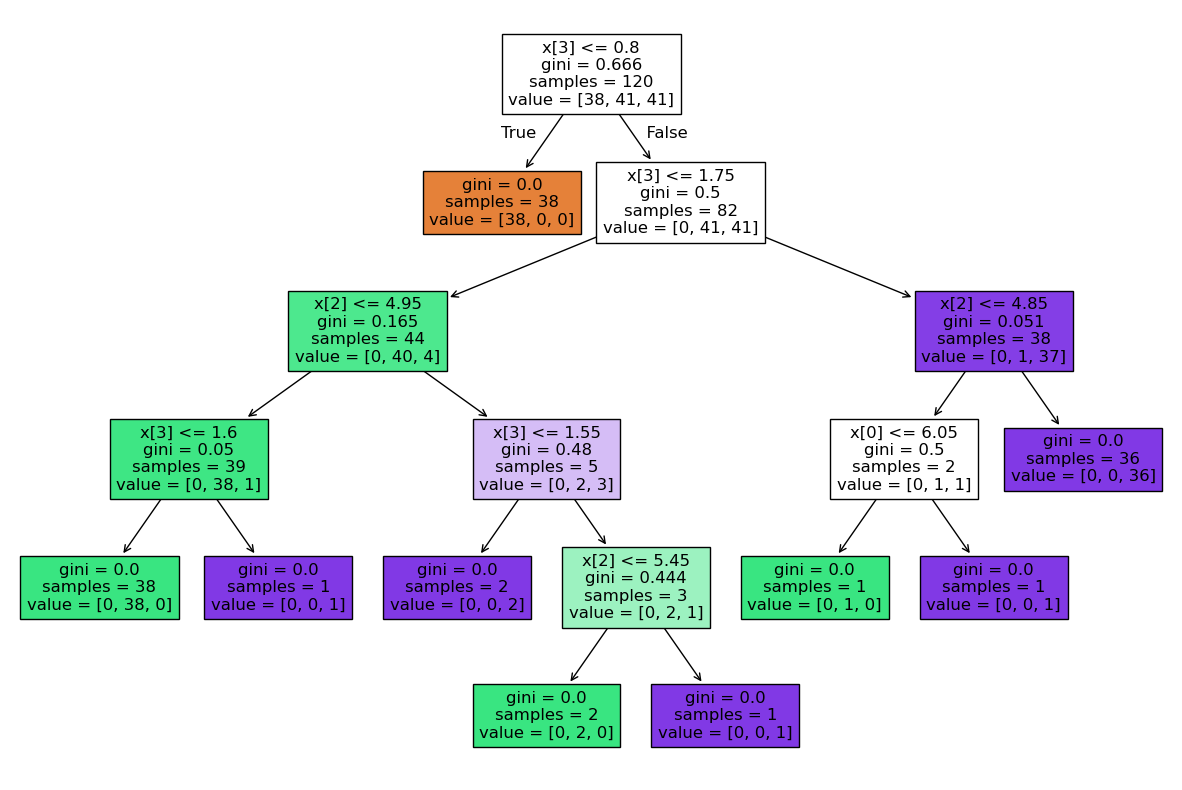

In [38]:
## visualizing the DT
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled=True )

In [39]:
y_pred = treeclassifier.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

In [41]:
cm = confusion_matrix(y_test, y_pred)

In [42]:
print(cm)
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



## Prepruning and Hyperparameter Tuning

In [43]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
treemodel = DecisionTreeClassifier()

In [46]:
grid = GridSearchCV(treemodel, param_grid=params, cv=5, scoring='accuracy')

In [47]:
grid.fit(X_train, y_train)

e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "e:\Coding\ML COURSE\code\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "e:\Coding\ML COURSE\

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [48]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [50]:
grid.best_score_

np.float64(0.9416666666666668)

In [51]:
y_pred = grid.predict(X_test)

In [52]:
y_pred

array([1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 0, 0])

In [53]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [54]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9666666666666667